In [450]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [451]:
df = pd.read_csv('/shared/2/projects/framing/data/labeled_data/stats_table_11-03-20.tsv',sep='\t')

In [452]:
df
df_lib = df[(df['country'] == 'US') & (df['libcon_raw']=='liberal')]
df_con = df[(df['country'] == 'US') & (df['libcon_raw']=='conservative')]
df_us = df[(df['country'] == 'US')]
df_eu = df[(df['country'] == 'EU')]
df_gb = df[(df['country'] == 'GB')]

In [453]:
issue_general_frames = ['Capacity and Resources','Crime and Punishment', 'Cultural Identity', 'Economic',
                        'External Regulation and Reputation', 'Fairness and Equality',
                        'Health and Safety', 'Legality, Constitutionality, Jurisdiction',
                        'Morality and Ethics', 'Policy Prescription and Evaluation',
                        'Political Factors and Implications', 'Public Sentiment',
                        'Quality of Life', 'Security and Defense']
issue_specific_frames = ['Threat: Fiscal','Threat: Jobs', 'Threat: National Cohesion', 'Threat: Public Order',
                         'Victim: Discrimination', 'Victim: Global Economy','Victim: Humanitarian', 'Victim: War',
                         'Hero: Cultural Diversity', 'Hero: Integration','Hero: Worker']
narrative_frames = ['Episodic','Thematic']

In [411]:
# issue_general_frames = ['Economic','Capacity and Resources','Quality of Life','Morality and Ethics',
#                        'Fairness and Equality','Public Sentiment','Cultural Identity',
#                        'Legality, Constitutionality, Jurisdiction', 'External Regulation and Reputation',
#                        'Policy Prescription and Evaluation','Political Factors and Implications',
#                         'Health and Safety','Crime and Punishment','Security and Defense',
#                       ]
# issue_specific_frames = ['Threat: Jobs','Threat: Fiscal','Victim: Global Economy','Hero: Worker', 
#                         'Hero: Integration','Threat: National Cohesion','Hero: Cultural Diversity',
#                        'Victim: Humanitarian','Victim: Discrimination','Threat: Public Order']
# narrative_frames = ['Episodic','Thematic']

In [454]:
def reorder_cols(df,ordered_list):
    df = df[ordered_list]
    return df

In [455]:
df = reorder_cols(df,issue_general_frames+issue_specific_frames+narrative_frames)
df_lib = reorder_cols(df_lib,issue_general_frames+issue_specific_frames+narrative_frames)
df_con = reorder_cols(df_con,issue_general_frames+issue_specific_frames+narrative_frames)
df_us = reorder_cols(df_us,issue_general_frames+issue_specific_frames+narrative_frames)
df_eu = reorder_cols(df_eu,issue_general_frames+issue_specific_frames+narrative_frames)
df_gb = reorder_cols(df_gb,issue_general_frames+issue_specific_frames+narrative_frames)

In [358]:
def plot_cooccur(df,frames1,frames2):
    sub1 = df[frames1]
    sub2 = df[frames2]
    coocc = sub1.T.dot(sub2)
    coocc_norm = coocc / coocc.max(axis=0)
    sns.heatmap(coocc,cmap="Blues")
    plt.show()
    sns.heatmap(coocc_norm,cmap='Greens')
    plt.show()

In [456]:
def calc_pmi(df,frames1,frames2):
    sub1 = df[frames1]
    sub2 = df[frames2]
    coocc = sub1.T.dot(sub2)
    all_pmi = []
    for frame1 in frames1:
        for frame2 in frames2: 
            if frame1 == frame2: 
                pmi = 0
            else:
                p_frame1 = df[frame1].sum() / len(df)
                p_frame2 = df[frame2].sum() / len(df)
                joint_p = coocc[frame2][frame1] / len(df)
                pmi = max(0,np.log(joint_p / (p_frame1*p_frame2)))
                all_pmi.append((frame1,frame2,pmi))
    df_pmi = pd.DataFrame(all_pmi)
    df_pmi.columns = ['Frame1','Frame2','PPMI']
    df_pmi = df_pmi.pivot(index='Frame1', columns='Frame2', values='PPMI')
    df_pmi = df_pmi.reindex(frames1)
    df_pmi = df_pmi[frames2]
    return df_pmi


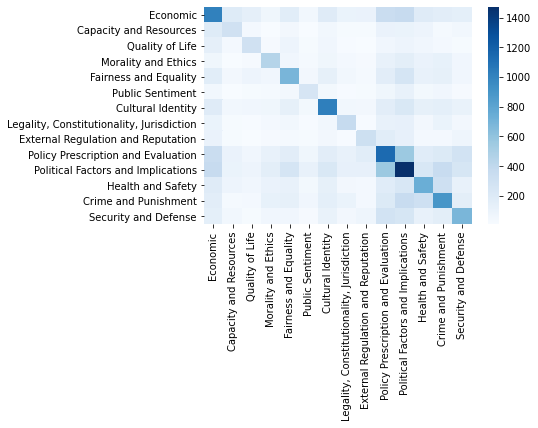

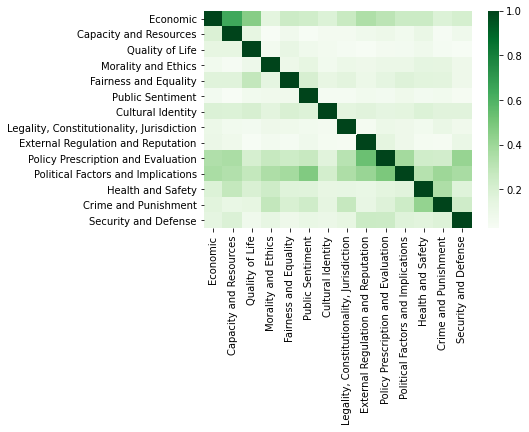

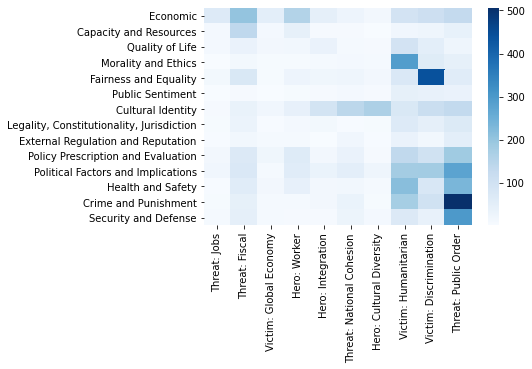

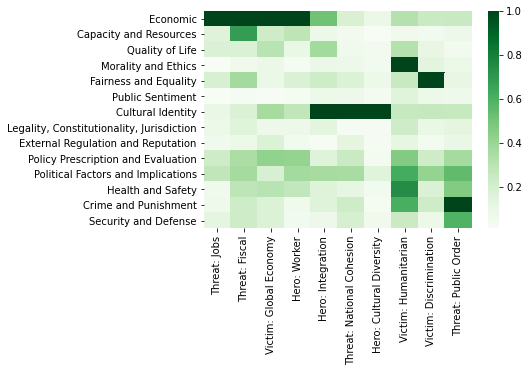

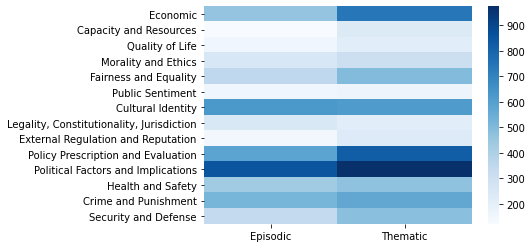

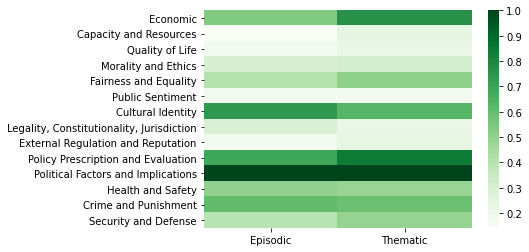

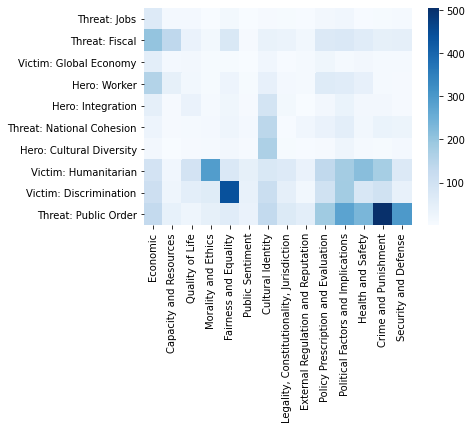

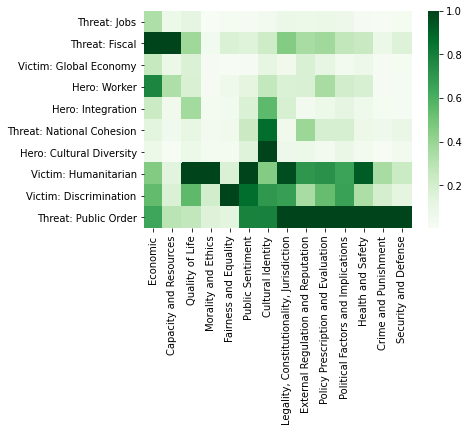

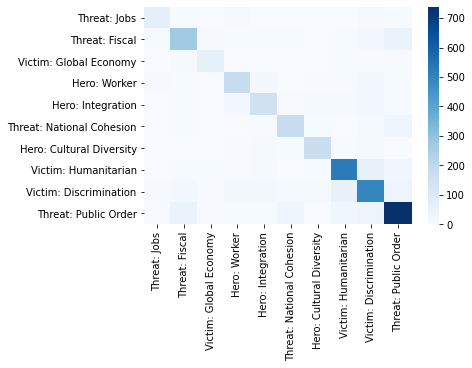

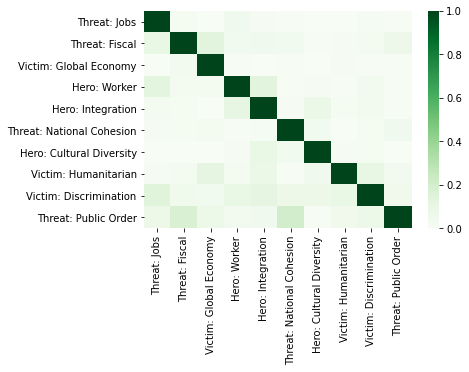

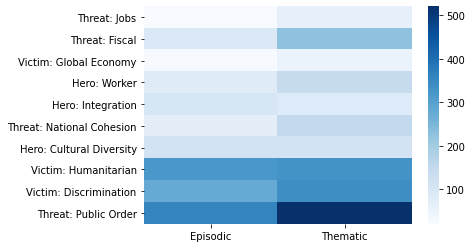

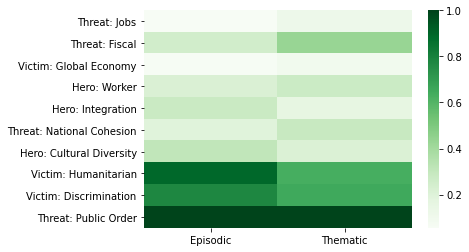

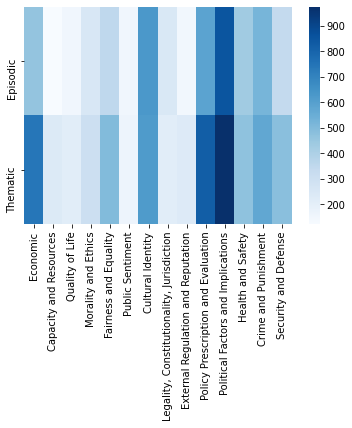

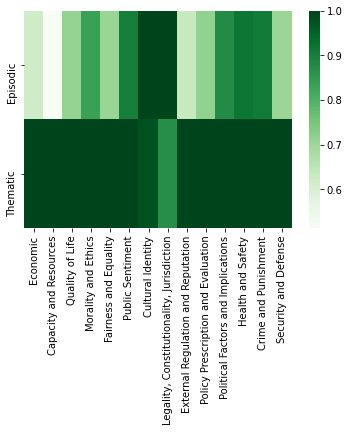

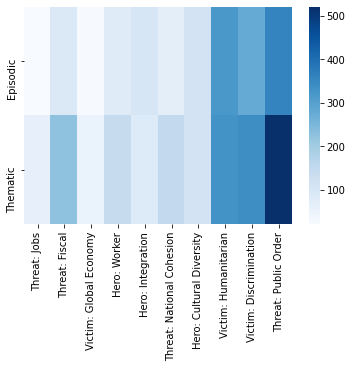

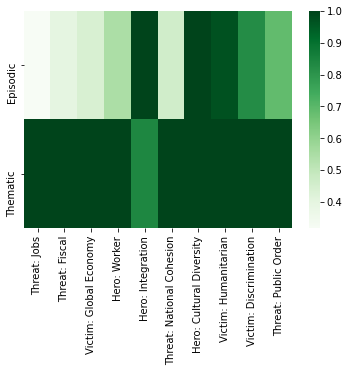

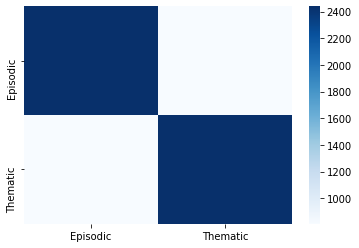

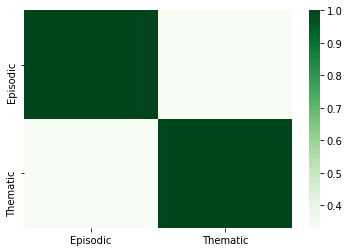

In [360]:
for frame1 in [issue_general_frames,issue_specific_frames,narrative_frames]:
    for frame2 in [issue_general_frames,issue_specific_frames,narrative_frames]:
        plot_cooccur(df,frame1,frame2)

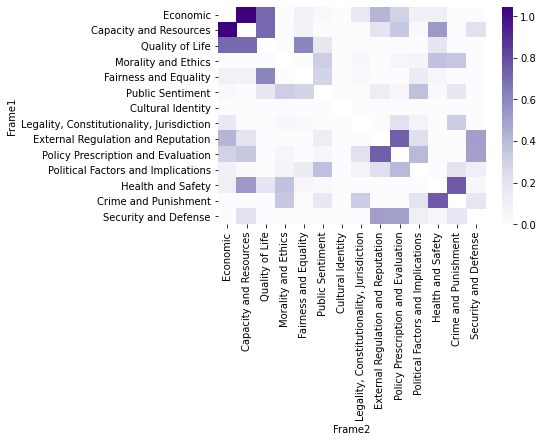

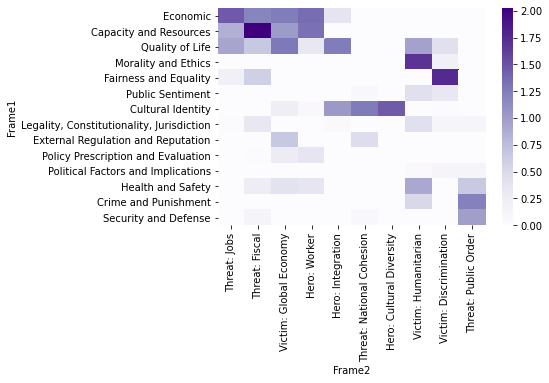

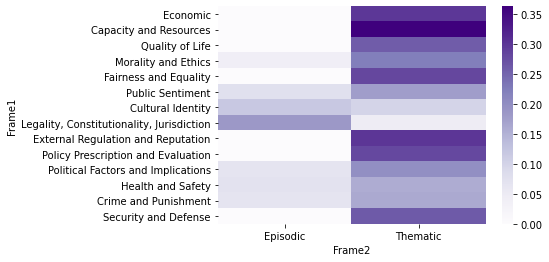

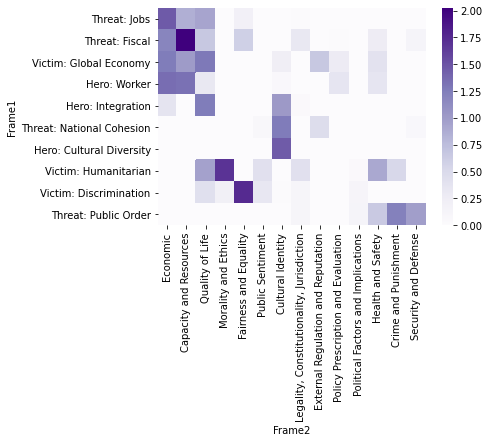

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


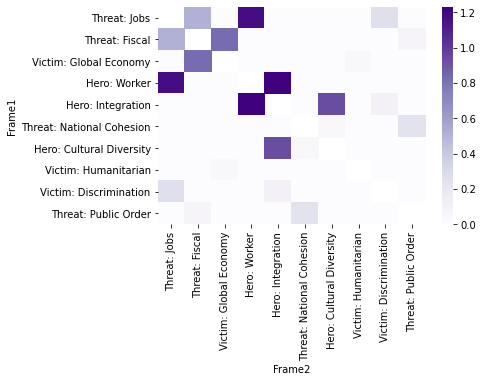

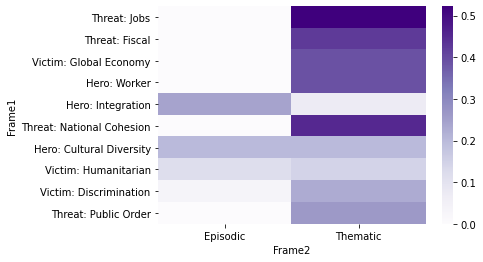

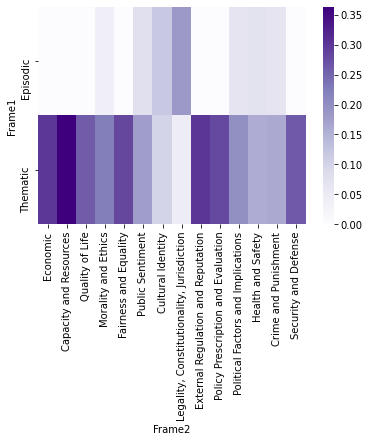

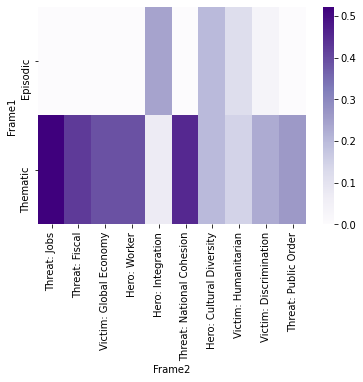

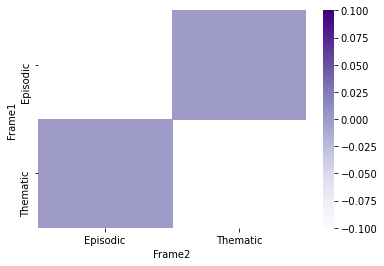

In [365]:
for frame1 in [issue_general_frames,issue_specific_frames,narrative_frames]:
    for frame2 in [issue_general_frames,issue_specific_frames,narrative_frames]:
        df_pmi = calc_pmi(df,frame1,frame2)
        sns.heatmap(df_pmi,cmap='Purples')
        plt.show()

In [271]:
def compare_pmi_by_ideology(df_lib,df_con,frames1,frames2):
    lib_pmi = calc_pmi(df_lib,frames1,frames2)
    con_pmi = calc_pmi(df_con,frames1,frames2)
    difference = con_pmi - lib_pmi
    sns.heatmap(difference,cmap='coolwarm')


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


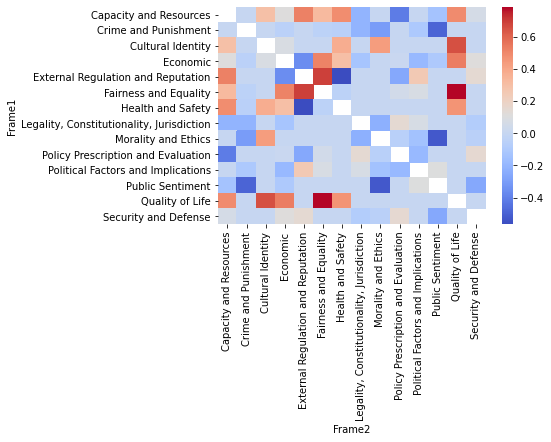

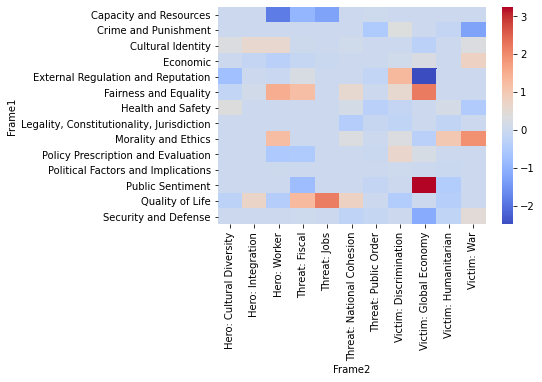

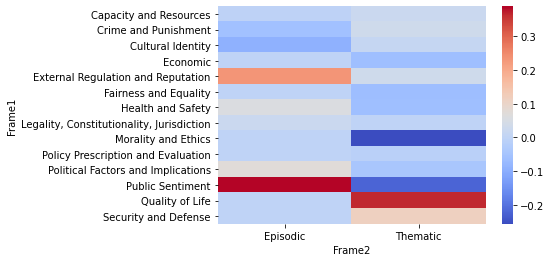

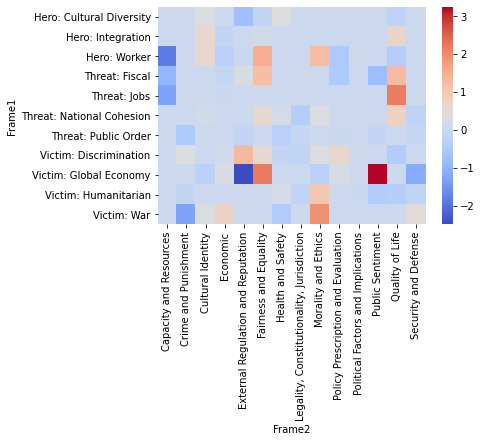

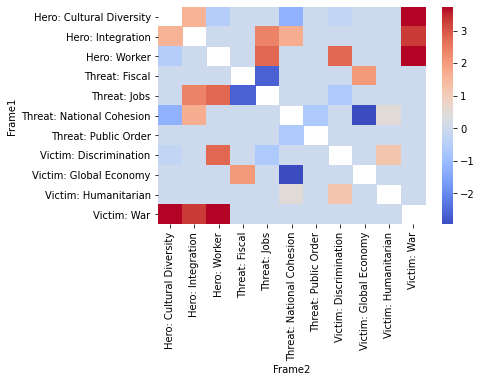

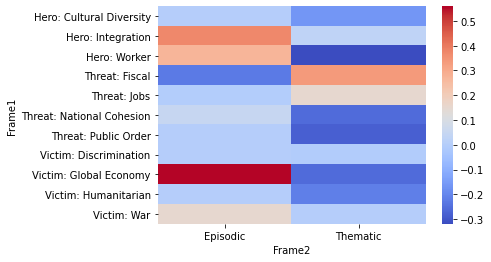

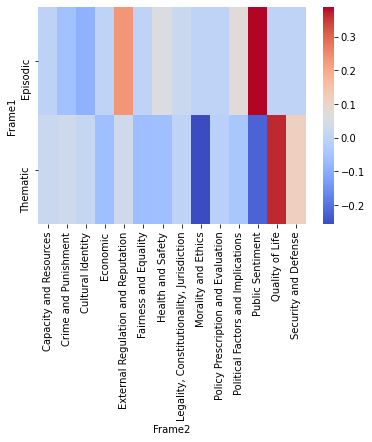

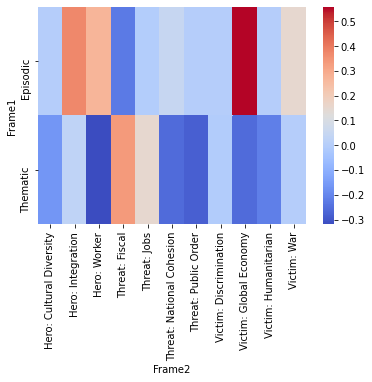

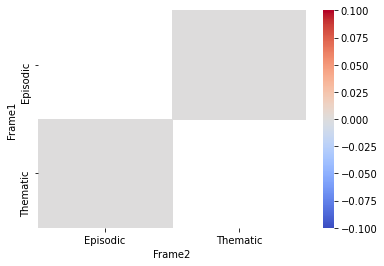

In [270]:
for frame1 in [issue_general_frames,issue_specific_frames,narrative_frames]:
    for frame2 in [issue_general_frames,issue_specific_frames,narrative_frames]:
        compare_pmi_by_ideology(df_lib,df_con,frame1,frame2)
        plt.show()

In [ ]:
def compare_pmi_by_ideology(df_lib,df_con,frames1,frames2):
    lib_pmi = calc_pmi(df_lib,frames1,frames2)
    con_pmi = calc_pmi(df_con,frames1,frames2)
    difference = con_pmi - lib_pmi
    sns.heatmap(difference,cmap='coolwarm')

In [294]:
df_pmi = calc_pmi(df,issue_general_frames,issue_specific_frames)

In [304]:
df_pmi.reset_index()
sorted_df_pmi = pd.melt(df_pmi.reset_index(),id_vars=['Frame1']).sort_values('value',ascending=False)

In [318]:
frame1_order = []
frame2_order = []
for i,row in enumerate(sorted_df_pmi.iterrows()):
    frame1 = sorted_df_pmi.iloc[i]['Frame1']
    frame2 = sorted_df_pmi.iloc[i]['Frame2']
    if frame1 not in frame1_order:
        frame1_order.append(frame1)
    if frame2 not in frame2_order:
        frame2_order.append(frame2)

In [316]:
sorted_df_pmi[sorted_df_pmi['value'] > 1].sort_values('Frame1')

,Frame1,Frame2,value
42,Capacity and Resources,Threat: Fiscal,2.026772
28,Capacity and Resources,Hero: Worker,1.333784
112,Capacity and Resources,Victim: Global Economy,1.008619
85,Crime and Punishment,Threat: Public Order,1.233142
2,Cultural Identity,Hero: Cultural Diversity,1.460674
72,Cultural Identity,Threat: National Cohesion,1.273163
16,Cultural Identity,Hero: Integration,1.021572
59,Economic,Threat: Jobs,1.471639
31,Economic,Hero: Worker,1.355876
115,Economic,Victim: Global Economy,1.263094


In [323]:
df_pmi

Frame2,Hero: Cultural Diversity,Hero: Integration,Hero: Worker,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War
Frame1,,,,,,,,,,,
Capacity and Resources,0.000000,0.000000,1.333784,2.026772,0.861889,0.000000,0.000000,0.000000,1.008619,0.000000,0.800980
Crime and Punishment,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.233142,0.015070,0.000000,0.525133,0.000000
Cultural Identity,1.460674,1.021572,0.063812,0.000000,0.000000,1.273163,0.000000,0.024153,0.242630,0.000000,0.779432
Economic,0.000000,0.373832,1.355876,1.198555,1.471639,0.000000,0.000000,0.000000,1.263094,0.000000,0.282265
External Regulation and Reputation,0.000000,0.000000,0.000000,0.000000,0.000000,0.469364,0.000000,0.000000,0.672619,0.000000,0.570340
Fairness and Equality,0.000000,0.000000,0.010050,0.595734,0.201646,0.000000,0.000000,1.751512,0.000000,0.000000,0.000000
Health and Safety,0.000000,0.000000,0.368035,0.271527,0.000000,0.000000,0.655433,0.000000,0.397993,0.912488,1.001284
"Legality, Constitutionality, Jurisdiction",0.000000,0.053004,0.000000,0.331595,0.029314,0.000000,0.116213,0.111209,0.000000,0.423969,0.000000
Morality and Ethics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208070,0.000000,1.697658,0.212094


In [334]:
sorted_df_pmi[sorted_df_pmi['value'] > 1].sort_values('Frame1')

,Frame1,Frame2,value
42,Capacity and Resources,Threat: Fiscal,2.026772
28,Capacity and Resources,Hero: Worker,1.333784
112,Capacity and Resources,Victim: Global Economy,1.008619
85,Crime and Punishment,Threat: Public Order,1.233142
2,Cultural Identity,Hero: Cultural Diversity,1.460674
72,Cultural Identity,Threat: National Cohesion,1.273163
16,Cultural Identity,Hero: Integration,1.021572
59,Economic,Threat: Jobs,1.471639
31,Economic,Hero: Worker,1.355876
115,Economic,Victim: Global Economy,1.263094


In [339]:
df_pmi

Frame2,Hero: Cultural Diversity,Hero: Integration,Hero: Worker,Threat: Fiscal,Threat: Jobs,Threat: National Cohesion,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War
Frame1,,,,,,,,,,,
Capacity and Resources,0.000000,0.000000,1.333784,2.026772,0.861889,0.000000,0.000000,0.000000,1.008619,0.000000,0.800980
Crime and Punishment,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.233142,0.015070,0.000000,0.525133,0.000000
Cultural Identity,1.460674,1.021572,0.063812,0.000000,0.000000,1.273163,0.000000,0.024153,0.242630,0.000000,0.779432
Economic,0.000000,0.373832,1.355876,1.198555,1.471639,0.000000,0.000000,0.000000,1.263094,0.000000,0.282265
External Regulation and Reputation,0.000000,0.000000,0.000000,0.000000,0.000000,0.469364,0.000000,0.000000,0.672619,0.000000,0.570340
Fairness and Equality,0.000000,0.000000,0.010050,0.595734,0.201646,0.000000,0.000000,1.751512,0.000000,0.000000,0.000000
Health and Safety,0.000000,0.000000,0.368035,0.271527,0.000000,0.000000,0.655433,0.000000,0.397993,0.912488,1.001284
"Legality, Constitutionality, Jurisdiction",0.000000,0.053004,0.000000,0.331595,0.029314,0.000000,0.116213,0.111209,0.000000,0.423969,0.000000
Morality and Ethics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.208070,0.000000,1.697658,0.212094


In [373]:
df

,Economic,Capacity and Resources,Quality of Life,Morality and Ethics,Fairness and Equality,Public Sentiment,Cultural Identity,"Legality, Constitutionality, Jurisdiction",External Regulation and Reputation,Policy Prescription and Evaluation,...,Victim: Global Economy,Hero: Worker,Hero: Integration,Threat: National Cohesion,Hero: Cultural Diversity,Victim: Humanitarian,Victim: Discrimination,Threat: Public Order,Episodic,Thematic
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
4496,1,0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4498,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [457]:
df_pmi = calc_pmi(df,list(df.columns),list(df.columns))

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  


In [458]:
df_pmi = df_pmi.fillna(0)

In [459]:
df_pmi.reset_index()

Frame2,Frame1,Capacity and Resources,Crime and Punishment,Cultural Identity,Economic,External Regulation and Reputation,Fairness and Equality,Health and Safety,"Legality, Constitutionality, Jurisdiction",Morality and Ethics,...,Threat: Public Order,Victim: Discrimination,Victim: Global Economy,Victim: Humanitarian,Victim: War,Hero: Cultural Diversity,Hero: Integration,Hero: Worker,Episodic,Thematic
0,Capacity and Resources,0.000000,0.000000,0.000000,1.045504,0.194145,0.088896,0.528710,0.000000,0.000000,...,0.000000,0.000000,1.008619,0.000000,0.800980,0.000000,0.000000,1.333784,0.000000,0.363409
1,Crime and Punishment,0.000000,0.000000,0.000000,0.000000,0.000000,0.011162,0.757410,0.324339,0.350065,...,1.233142,0.015070,0.000000,0.525133,0.000000,0.000000,0.000000,0.000000,0.066956,0.162912
2,Cultural Identity,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.024153,0.242630,0.000000,0.779432,1.460674,1.021572,0.063812,0.118955,0.100544
3,Economic,1.045504,0.000000,0.000000,0.000000,0.424666,0.092702,0.115943,0.161187,0.000000,...,0.000000,0.000000,1.263094,0.000000,0.282265,0.000000,0.373832,1.355876,0.000000,0.299755
4,External Regulation and Reputation,0.194145,0.000000,0.000000,0.424666,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.672619,0.000000,0.570340,0.000000,0.000000,0.000000,0.000000,0.302297
5,Fairness and Equality,0.088896,0.011162,0.000000,0.092702,0.000000,0.000000,0.054552,0.024976,0.000000,...,0.000000,1.751512,0.000000,0.000000,0.000000,0.000000,0.000000,0.010050,0.000000,0.282880
6,Health and Safety,0.528710,0.757410,0.000000,0.115943,0.000000,0.054552,0.000000,0.000000,0.370842,...,0.655433,0.000000,0.397993,0.912488,1.001284,0.000000,0.000000,0.368035,0.071186,0.158248
7,"Legality, Constitutionality, Jurisdiction",0.000000,0.324339,0.000000,0.161187,0.000000,0.024976,0.000000,0.000000,0.040243,...,0.116213,0.111209,0.000000,0.423969,0.000000,0.000000,0.053004,0.000000,0.185747,0.048417
8,Morality and Ethics,0.000000,0.350065,0.000000,0.000000,0.000000,0.000000,0.370842,0.040243,0.000000,...,0.000000,0.208070,0.000000,1.697658,0.212094,0.000000,0.000000,0.000000,0.041268,0.223112
9,Policy Prescription and Evaluation,0.345415,0.000000,0.000000,0.297277,0.741547,0.000000,0.000000,0.215120,0.059687,...,0.000000,0.000000,0.284455,0.013254,0.000000,0.000000,0.000000,0.364498,0.000000,0.282233


In [460]:
df_for_network = pd.melt(df_pmi.reset_index(),id_vars=['Frame1'])
df_for_network.columns = ['source','target','weight']

In [461]:
df_for_network

,source,target,weight
0,Capacity and Resources,Capacity and Resources,0.000000
1,Crime and Punishment,Capacity and Resources,0.000000
2,Cultural Identity,Capacity and Resources,0.000000
3,Economic,Capacity and Resources,1.045504
4,External Regulation and Reputation,Capacity and Resources,0.194145
...,...,...,...
724,Hero: Cultural Diversity,Thematic,0.201910
725,Hero: Integration,Thematic,0.072354
726,Hero: Worker,Thematic,0.390166
727,Episodic,Thematic,0.000000


In [554]:
import networkx as nx
import matplotlib as mpl


In [463]:
df_above_thresh = df_for_network[df_for_network['weight'] > 0.5]

In [540]:
df_above_thresh = df_for_network[df_for_network['weight'] > 0.5]
G = nx.from_pandas_edgelist(df_above_thresh,edge_attr='weight')

{'Economic': 'Economic', 'Capacity and Resources': 'Capacity', 'Health and Safety': 'Health', 'Quality of Life': 'Quality', 'Threat: Fiscal': 'Threat:Fiscal', 'Threat: Jobs': 'Threat:Jobs', 'Victim: Global Economy': 'Victim:Global Economy', 'Victim: War': 'Victim:War', 'Hero: Worker': 'Hero:Worker', 'Crime and Punishment': 'Crime', 'Threat: Public Order': 'Threat:Public Order', 'Victim: Humanitarian': 'Victim:Humanitarian', 'Threat: National Cohesion': 'Threat:National Cohesion', 'Cultural Identity': 'Cultural', 'Hero: Cultural Diversity': 'Hero:Cultural Diversity', 'Hero: Integration': 'Hero:Integration', 'Policy Prescription and Evaluation': 'Policy', 'External Regulation and Reputation': 'External', 'Security and Defense': 'Security', 'Fairness and Equality': 'Fairness', 'Victim: Discrimination': 'Victim:Discrimination', 'Morality and Ethics': 'Morality', 'Thematic': 'Thematic'}


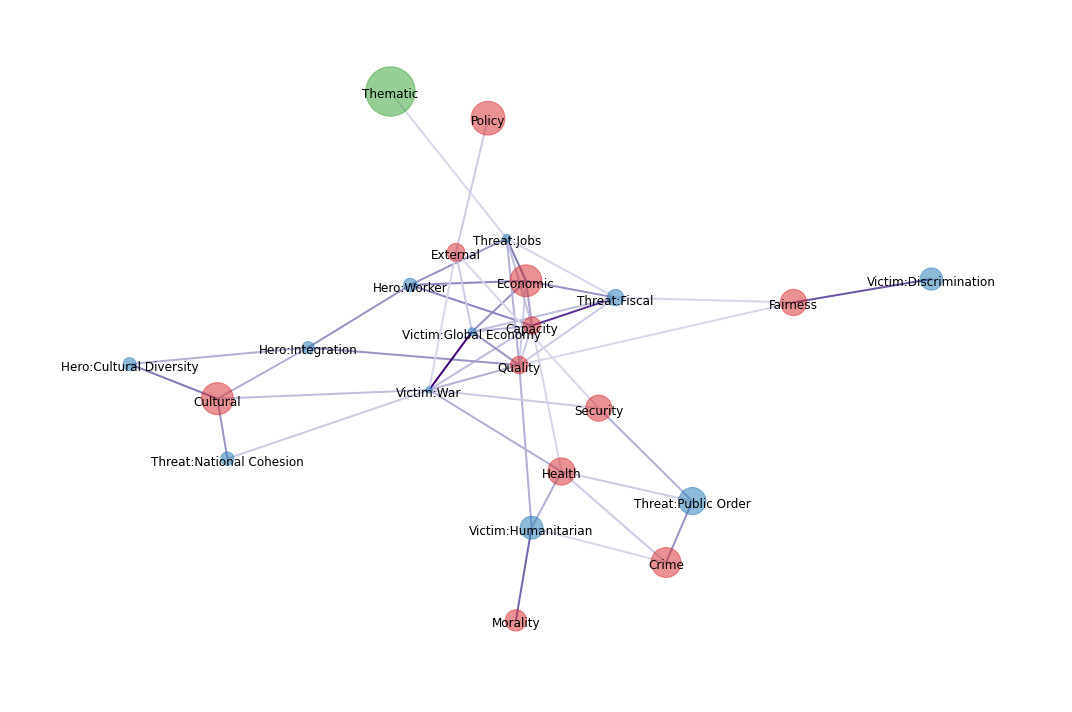

In [559]:

edges = G.edges()
nodes = G.nodes()
weights = [G[u][v]['weight'] for u,v in edges]
widths = [2*w for w in weights]
ig_nodes = [f for f in issue_general_frames if f in G.nodes()]
is_nodes = [f for f in issue_specific_frames if f in G.nodes()]
narr_nodes = [f for f in narrative_frames if f in G.nodes()]


cmap = mpl.cm.Purples(np.linspace(0,1,20))
cmap = mpl.colors.ListedColormap(cmap[5:,:])

plt.figure(figsize=(15,10))

pos = nx.spring_layout(G)

labels = {k:k for k in G.nodes()}
for l in labels.keys():
    new_label = labels[l].replace(': ',':')
    if l in issue_general_frames:
        new_label = new_label.split()[0]
    labels[l] = new_label
print(labels)


y_off = 0.01
nx.draw_networkx_labels(G, pos = {k:([v[0], v[1]-y_off]) for k,v in pos.items()},labels=labels)

nx.draw_networkx_nodes(G, pos, nodelist=ig_nodes, node_color="tab:red",node_size = list(df.sum()[ig_nodes]),alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=is_nodes, node_color="tab:blue",node_size = list(df.sum()[is_nodes]),alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=narr_nodes, node_color="tab:green",node_size = list(df.sum()[narr_nodes]),alpha=0.5)
nx.draw_networkx_edges(G, pos, edges=edges,width=2,edge_color=widths,edge_cmap=cmap)
#nx.draw_networkx_edges(G, pos, edges=edges,width=widths,edge_color='grey')


plt.axis('off')
axis = plt.gca()
axis.set_xlim([1.2*x for x in axis.get_xlim()])
axis.set_ylim([1.2*y for y in axis.get_ylim()])
plt.tight_layout()
plt.show()



In [561]:
G.nodes()

NodeView(('Economic', 'Capacity and Resources', 'Health and Safety', 'Quality of Life', 'Threat: Fiscal', 'Threat: Jobs', 'Victim: Global Economy', 'Victim: War', 'Hero: Worker', 'Crime and Punishment', 'Threat: Public Order', 'Victim: Humanitarian', 'Threat: National Cohesion', 'Cultural Identity', 'Hero: Cultural Diversity', 'Hero: Integration', 'Policy Prescription and Evaluation', 'External Regulation and Reputation', 'Security and Defense', 'Fairness and Equality', 'Victim: Discrimination', 'Morality and Ethics', 'Thematic'))

In [562]:
nx.transitivity(G)

0.4368932038834951

In [567]:
eigen_centrality = nx.eigenvector_centrality(G,weight='weight')
{k: v for k, v in sorted(eigen_centrality.items(), key=lambda item: item[1],reverse=True)}

{'Capacity and Resources': 0.41758544668240544,
 'Victim: Global Economy': 0.3941841837657847,
 'Economic': 0.3759973143884365,
 'Quality of Life': 0.3458085802281665,
 'Threat: Fiscal': 0.32960409881615704,
 'Victim: War': 0.31062828055929226,
 'Threat: Jobs': 0.27785894778118897,
 'Hero: Worker': 0.2532725523990384,
 'Hero: Integration': 0.14041134707614863,
 'Health and Safety': 0.10256705312608716,
 'Cultural Identity': 0.08198159070021523,
 'Victim: Humanitarian': 0.07676179460104744,
 'External Regulation and Reputation': 0.07644749229462372,
 'Fairness and Equality': 0.07170070891595479,
 'Threat: National Cohesion': 0.049242108868739295,
 'Security and Defense': 0.04803848097213792,
 'Hero: Cultural Diversity': 0.04060181278424175,
 'Crime and Punishment': 0.023681958999106908,
 'Thematic': 0.023442456981179506,
 'Threat: Public Order': 0.023208749259061266,
 'Morality and Ethics': 0.021048998193419415,
 'Victim: Discrimination': 0.020284558448848,
 'Policy Prescription and Eva

In [603]:
G = nx.from_pandas_edgelist(df_for_network,edge_attr='weight')

In [611]:
eigen_centrality = nx.eigenvector_centrality(G,weight='weight')
#pd.DataFrame({k: v for k, v in sorted(eigen_centrality.items(), key=lambda item: item[1],reverse=True)})
pd.DataFrame(eigen_centrality.items()).sort_values(1,ascending=False).round(3)[:15]

,0,1
0,Capacity and Resources,0.374
19,Victim: Global Economy,0.368
3,Economic,0.353
12,Quality of Life,0.327
21,Victim: War,0.326
14,Threat: Fiscal,0.301
24,Hero: Worker,0.250
15,Threat: Jobs,0.247
26,Thematic,0.175
23,Hero: Integration,0.169


In [613]:
katz = nx.katz_centrality(G,weight='weight')
pd.DataFrame(katz.items()).sort_values(1,ascending=False).round(3)[:15]

,0,1
0,Capacity and Resources,0.307
19,Victim: Global Economy,0.304
3,Economic,0.294
21,Victim: War,0.292
12,Quality of Life,0.289
14,Threat: Fiscal,0.258
24,Hero: Worker,0.231
15,Threat: Jobs,0.224
26,Thematic,0.200
6,Health and Safety,0.194


In [616]:
betweenness_centrality = nx.betweenness_centrality(G,weight='weight')
# {k: v for k, v in sorted(betweenness_centrality.items(), key=lambda item: item[1],reverse=True)}
pd.DataFrame(betweenness_centrality.items()).sort_values(1,ascending=False).round(0)[:15]

,0,1
2,Cultural Identity,4436.0
13,Security and Defense,1475.0
7,"Legality, Constitutionality, Jurisdiction",1327.0
4,External Regulation and Reputation,1016.0
17,Threat: Public Order,653.0
15,Threat: Jobs,520.0
1,Crime and Punishment,355.0
16,Threat: National Cohesion,333.0
14,Threat: Fiscal,269.0
8,Morality and Ethics,248.0


In [581]:
sim = nx.algorithms.similarity.simrank_similarity(G)
lol = [[sim[u][v] for v in sorted(sim[u])] for u in sorted(sim)]
sim_array = array(lol)

AttributeError: module 'networkx.algorithms.similarity' has no attribute 'simrank_similarity'

In [586]:
df_above_thresh = df_for_network[df_for_network['weight'] > 0.5]
G2 = nx.from_pandas_edgelist(df_above_thresh,edge_attr='weight')
list(nx.algorithms.community.greedy_modularity_communities(G2,weight='weight'))

[frozenset({'Capacity and Resources',
            'Economic',
            'Fairness and Equality',
            'Hero: Worker',
            'Quality of Life',
            'Thematic',
            'Threat: Fiscal',
            'Threat: Jobs',
            'Victim: Discrimination'}),
 frozenset({'Crime and Punishment',
            'Health and Safety',
            'Morality and Ethics',
            'Security and Defense',
            'Threat: Public Order',
            'Victim: Humanitarian'}),
 frozenset({'Cultural Identity',
            'Hero: Cultural Diversity',
            'Hero: Integration',
            'Threat: National Cohesion',
            'Victim: War'}),
 frozenset({'External Regulation and Reputation',
            'Policy Prescription and Evaluation',
            'Victim: Global Economy'})]

In [601]:
from networkx.algorithms.community.centrality import girvan_newman
comp = girvan_newman(G2)
#tuple(sorted(c) for c in next(comp))

In [602]:
for c in comp:
    if len(c) < 8:
        print(f'{len(c)} Communities')
        for i,group in enumerate(c):
            print(f'Community {i+1}: {group}')
        print('-------------')

2 Communities
Community 1: {'Capacity and Resources', 'Cultural Identity', 'Hero: Cultural Diversity', 'Thematic', 'Security and Defense', 'Victim: Discrimination', 'Threat: Jobs', 'Hero: Worker', 'Economic', 'Threat: Fiscal', 'Threat: National Cohesion', 'External Regulation and Reputation', 'Victim: Global Economy', 'Quality of Life', 'Victim: War', 'Policy Prescription and Evaluation', 'Fairness and Equality', 'Hero: Integration'}
Community 2: {'Health and Safety', 'Morality and Ethics', 'Victim: Humanitarian', 'Crime and Punishment', 'Threat: Public Order'}
-------------
3 Communities
Community 1: {'Capacity and Resources', 'Cultural Identity', 'Hero: Cultural Diversity', 'Security and Defense', 'Threat: Jobs', 'Hero: Worker', 'Economic', 'Threat: Fiscal', 'Threat: National Cohesion', 'External Regulation and Reputation', 'Victim: Global Economy', 'Quality of Life', 'Victim: War', 'Policy Prescription and Evaluation', 'Thematic', 'Hero: Integration'}
Community 2: {'Health and Safet